# <font color='orange'>DIP Exercise 04</font>

## Image Histogram   直方图

A histogram provides information about the intensity
distribution of an image.
Here is an illustation of loading an image and plotting a histogram.

直方图提供了图像强度分布的信息。
下面是加载图像并绘制直方图的示例。

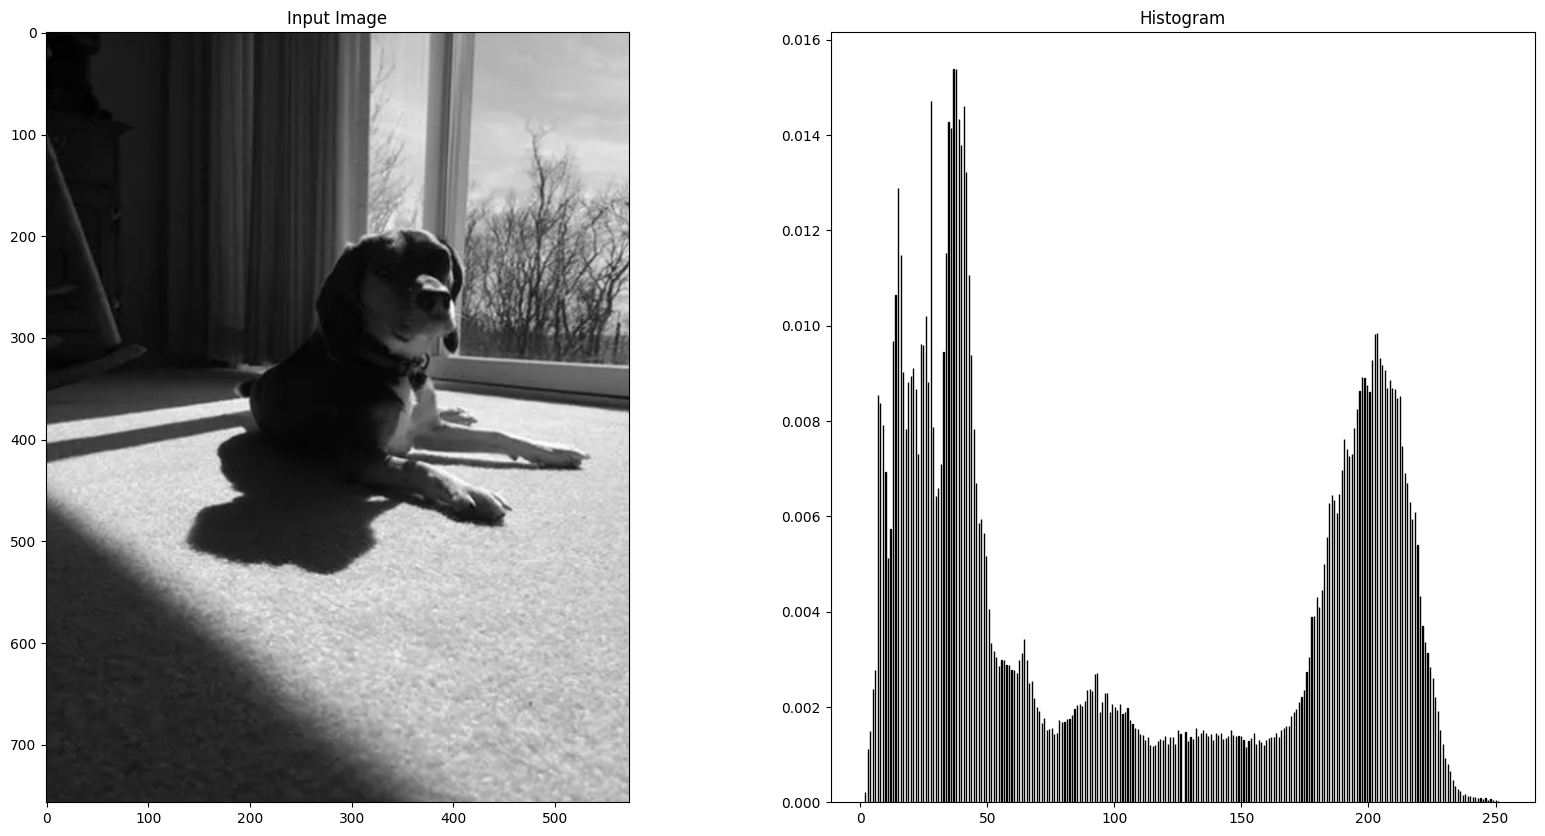

In [1]:
import cv2   #OpenCV (开源计算机视觉库) 提供了许多图像处理和计算机视觉功能，
import matplotlib.pyplot as plt 
import numpy as np
import imageio   # ImageIO 是一个图像输入/输出库，用于读取和写入各种图像格式，包括 PNG、JPEG、GIF、TIFF 等。

img_input = cv2.imread('dog.png')
img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)   #OpenCV 中的 cv2.cvtColor 函数将输入的彩色图像（img_input）转换为灰度图像（img）。
                                        ## 这里的参数 cv2.COLOR_BGR2GRAY 指定了颜色转换的方式，将彩色图像从 BGR（蓝绿红）颜色空间转换为灰度（单通道）颜色空间。

fig, ax = plt.subplots(1, 2, figsize=(20, 10))   #  ax[0] 和 ax[1] 来访问和操作这两个子图
hist, bins = np.histogram(img, bins=255, density=True)   #density=True 表示计算归一化的直方图  ,bins 是箱体边界的数组，它表示直方图中每个箱体的范围。

# Show the images
ax[0].set_title('Input Image')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Histogram')
ax[1].bar(bins[:-1], hist, width=0.05, edgecolor='k'); ## ; to print the unwanted displaying part

## Gamma Transformation and Histogram Equalization   
## 伽马变换和直方图均衡化

Raise the intensity of each pixel to the power of $\gamma$.  将每个像素的强度提高到$\gamma$的幂。

<img src='question_sign.png' width=20px height=20px style="float:left;"> Which range of gamma makes the image lighter? Which range makes it darker?

哪个范围的伽马使图像更亮?哪个范围更暗?

伽马校正是一种调整图像亮度的技术，通过对图像的像素值进行幂函数变换来实现。伽马值（γ）的不同范围可以影响图像的亮度。一般而言：

- 当伽马值小于1时，图像会变得更亮。这是因为将像素值的小幅增加映射到更大的范围，使图像整体变得更亮。较小的伽马值会减少暗部的对比度，使它们更明亮。

- 当伽马值大于1时，图像会变得更暗。这是因为将像素值的小幅增加映射到较小的范围，使图像整体变得更暗。较大的伽马值可能增加暗部的对比度，使它们更显著。

总的来说，伽马值小于1会增加图像的亮度，而伽马值大于1会减小图像的亮度。不同的伽马值会产生不同的效果，您可以根据需要进行调整以实现所需的图像亮度变化。

<img src='question_sign.png' width=20px height=20px style="float:left;"> What happens to the image histogram with gamma transformation?

变换后的图像直方图会发生什么?

伽马校正会显著影响图像的直方图分布。变换后的图像直方图可能会发生以下变化：

1. **拉伸和压缩**：伽马校正可以拉伸或压缩图像的像素值范围，取决于伽马值的大小。较小的伽马值（< 1）会拉伸直方图，使像素值更加分散，从而增强图像的对比度和细节。较大的伽马值（> 1）会压缩直方图，使像素值更加集中，从而降低图像的对比度。

2. **亮度调整**：伽马值小于1时，暗部像素值会受到更大的影响，使得暗部细节更明显，整体图像更亮。伽马值大于1时，亮部像素值会受到更大的影响，导致图像变暗。

3. **峰值移动**：伽马校正可以导致直方图峰值的移动。较小的伽马值会将峰值向右移动，而较大的伽马值会将峰值向左移动。这可能导致图像整体的亮度偏移。

4. **动态范围变化**：伽马校正可以影响图像的动态范围，即最暗和最亮像素值之间的差异。小伽马值可以增加动态范围，使图像在暗部和亮部都具有更多细节。大伽马值可能减小动态范围，导致图像的亮部和暗部细节损失。

综上所述，伽马校正会改变图像的亮度、对比度和分布，从而对图像直方图产生显著影响。不同的伽马值会导致不同的直方图形状，从而影响图像的外观和视觉感知。

Adapt the code given below to take 4 gamma values and plot the histograms. Equalize the histograms and plot the resulting images. 

调整下面给出的代码，取4个伽马值并绘制直方图。均衡化直方图并绘制结果图像。

<img src='question_sign.png' width=20px height=20px style="float:left;"> Do all of them have the same histogram?
它们都有相同的直方图吗?   no

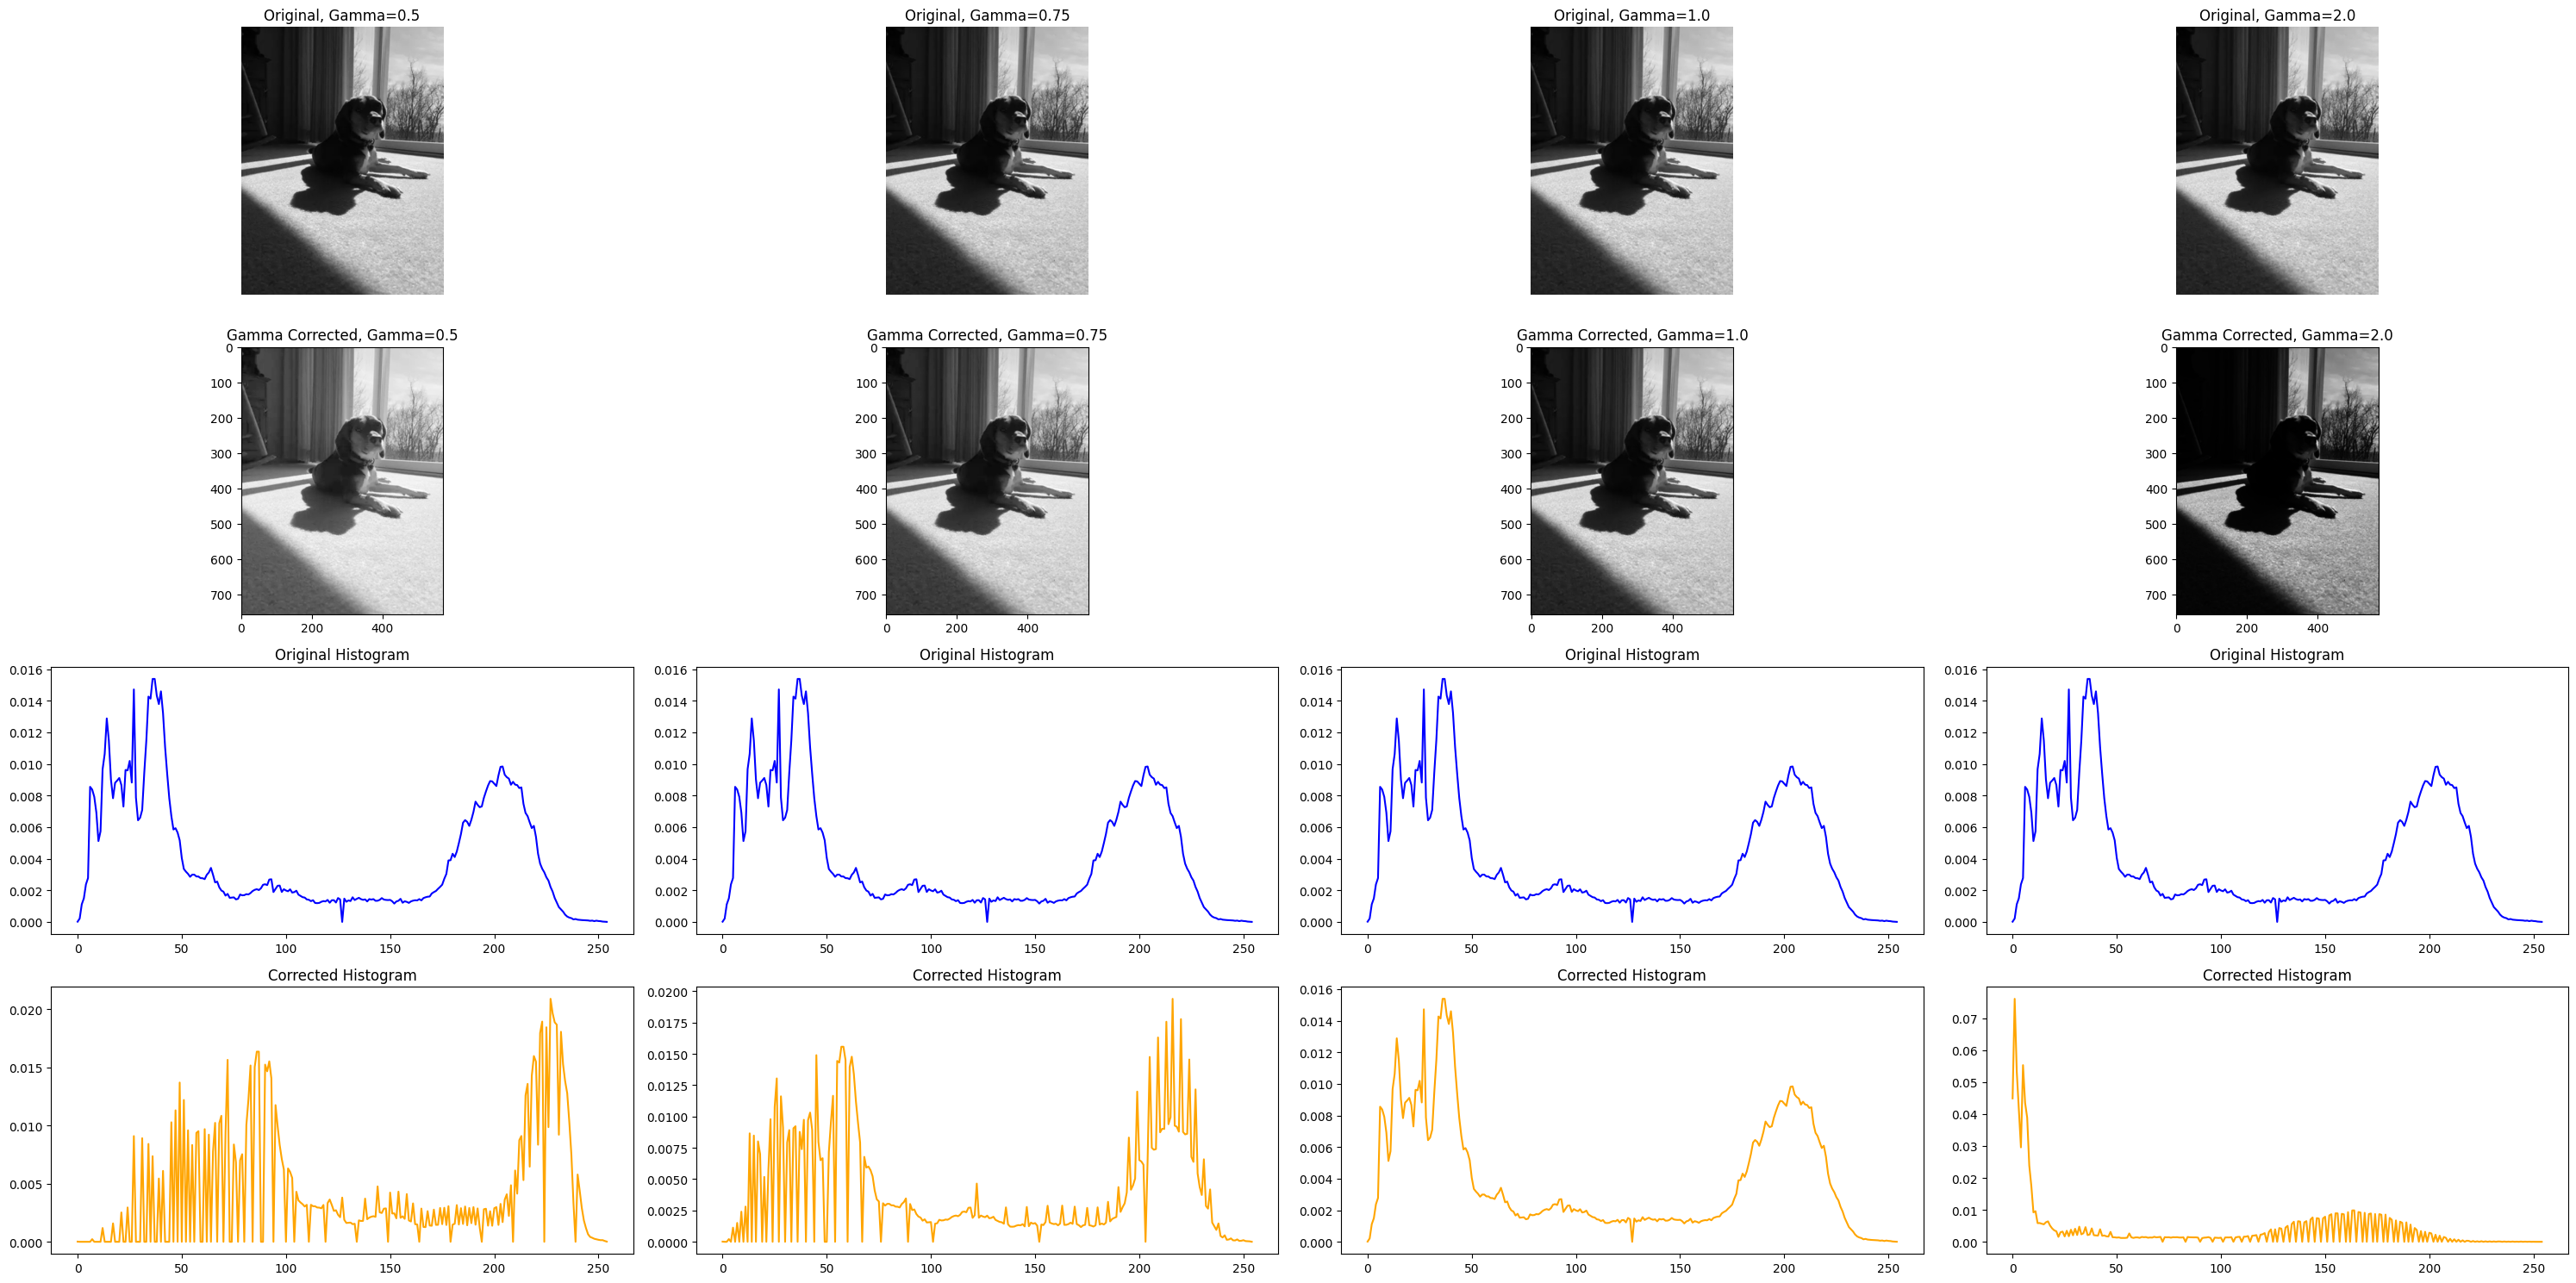

In [2]:
from skimage import io, exposure   #skimage库中的io和exposure模块，用于图像的输入输出和亮度调整。  pip install scikit-image
import cv2
import numpy as np
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

img_input = cv2.imread('dog.png')
img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

Gamma =  [0.5,0.75,1.0,2.0] 

fig, ax = plt.subplots(4, len(Gamma), figsize=(30, 15))

#### To do loop through use cv2.equalizeHist for histogram equalization   使用cv2.equalizeHist来执行循环用于直方图均衡化
for index, gamma in enumerate(Gamma):
    img_gamma_corrected = exposure.adjust_gamma(img, gamma)   # exposure.adjust_gamma函数用于对图像进行伽马校正，
    ax[0, index].imshow(img, cmap='gray')   # 第一行的子图中显示原始图像
    ax[0, index].set_title(f'Original, Gamma={gamma}')   
    ax[0, index].axis('off')   # 关闭坐标轴显示
    
    ax[1, index].imshow(img_gamma_corrected, cmap='gray')   # cmap是Matplotlib中的一个参数，用于指定颜色映射（color map）
    ax[1, index].set_title(f'Gamma Corrected, Gamma={gamma}')
   # ax[1, index].axis('off')
    
    hist_original, bins_original = np.histogram(img, bins=255, density=True)   
    hist_corrected, bins_corrected = np.histogram(img_gamma_corrected, bins=255, density=True)
    
    ax[2, index].plot(hist_original, color='blue')
    ax[2, index].set_title('Original Histogram')
    
    ax[3, index].plot(hist_corrected, color='orange')
    ax[3, index].set_title('Corrected Histogram')

plt.tight_layout()   # plt.tight_layout() 可以自动调整子图的布局，使它们更好地适应图表区域，以便元素不会重叠，同时保持整体的可视化效果
plt.show()

## Gaussian Filtering   高斯滤波


The Gaussian filter acts as a low-pass filter. It has the low-pass behaviour in frequency domain as well.

高斯滤波器作为一个低通滤波器。它在频域也具有低通特性。



<img src='question_sign.png' width=20px height=20px style="float:left;"> Explain the concept of a seperable filter kernel. What is the advantage of such a filter kernel?

解释可分离过滤器核的概念。这种过滤器内核的优点是什么?

可分离滤波器核是一种用于图像处理和计算机视觉中的滤波器设计方法。它的基本思想是将一个二维滤波操作分解成两个一维滤波操作，从而实现更高效的图像滤波。

具体来说，一个可分离滤波器核可以被分解成一个垂直方向的一维核（列核）和一个水平方向的一维核（行核）。通过将这两个一维核分别应用于图像的行和列，就可以实现原始二维核所实现的滤波效果。

可分离滤波器核的优点包括：

计算效率： 由于分解为两个一维滤波操作，可分离滤波器核的计算速度通常比原始二维核更快。这是因为一维滤波操作在计算上更简单，所以整个滤波过程可以更快地完成。

存储效率： 可分离滤波器核只需要存储两个一维核，而不需要存储完整的二维核。这可以节省内存空间，特别是在核尺寸较大时。

减少边缘效应： 一维滤波操作通常不会引入二维滤波操作可能引入的边缘效应。这可以降低在图像边缘产生的伪影或不良效果。

精确性： 尽管可分离滤波器核是通过近似实现的，但在实践中往往可以获得与原始核类似的滤波效果，尤其是在一些实际应用中。

总之，可分离滤波器核是一种有效的滤波器设计方法，可以在保持滤波质量的同时提高计算和存储效率。这种方法常常用于实时图像处理和计算机视觉任务，如边缘检测、模糊、锐化等。

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are important properties of Gaussian filters?

高斯滤波器的重要特性是什么?

高斯滤波器是图像处理中常用的一种平滑滤波器，它的重要特性包括：

平滑效果： 高斯滤波器通过对图像中的像素进行加权平均，可以降低图像中的高频噪声和细节，从而实现图像的平滑化。这对于去除噪声、模糊化或降低图像中的细节非常有用。

线性性质： 高斯滤波器是线性滤波器，这意味着它可以通过将多个滤波操作叠加来实现复杂的滤波效果。这种线性性质使得高斯滤波器在图像处理中具有很大的灵活性。

尺度参数： 高斯滤波器具有一个尺度参数，通常表示为标准差（或方差）。这个参数决定了滤波器的大小和程度。通过调整尺度参数，可以控制滤波器的平滑程度，从而适应不同的应用需求。

边缘保留： 高斯滤波器在平滑图像的同时，相对于一些其他平滑滤波器，能够更好地保留图像的边缘信息。这是因为高斯滤波器是基于高斯分布的，具有一定的平滑性同时也能够保持边缘的相对清晰。

可分离性： 高斯滤波器具有可分离性，这意味着可以将二维高斯滤波器分解为两个一维滤波操作。这种特性可以显著减少计算量，提高滤波效率。

多尺度应用： 高斯滤波器常常用于图像金字塔构建和多尺度分析中。不同尺度的高斯滤波器可以用于提取图像中不同层次的特征。

总的来说，高斯滤波器在图像处理中具有平滑、边缘保留和尺度可调等重要特性，使其在许多图像处理任务中都发挥着重要作用，如去噪、平滑、边缘检测的前处理等。

Given below is the code for Gaussian filtering an input image with a fixed standard deviation $\sigma$ = 2.

下面给出的代码是高斯滤波输入图像的固定标准差$\sigma$ = 2。

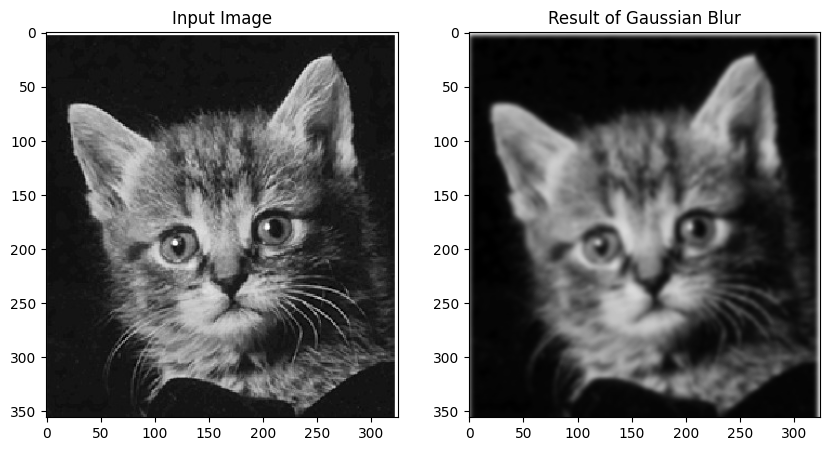

In [3]:
from scipy.ndimage import gaussian_filter

img_input = cv2.imread('cat.jpg')
img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

img_patch_gaussian = gaussian_filter(img,2)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(img_patch_gaussian, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of Gaussian Blur')
plt.show()

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the main parameters of a Gaussian distribution?

高斯分布的主要参数是什么?

高斯分布（也称为正态分布）是统计学中一种重要的概率分布，它由两个主要参数来描述其形状：

1. **均值（Mean）：** 均值是高斯分布的中心位置，也可以被认为是分布的期望值。它表示了分布的平均位置。在数学符号中，均值通常用 μ 表示。

2. **标准差（Standard Deviation）：** 标准差是高斯分布数据在均值周围波动的程度的度量。它决定了分布的宽度。标准差越小，分布越瘦长；标准差越大，分布越宽广。在数学符号中，标准差通常用 σ 表示。


<img src='question_sign.png' width=20px height=20px style="float:left;"> Which is a good kernel size for a Gaussian filter kernel and why?

对于高斯滤波器核来说，哪个是合适的核大小，为什么?

选择适当的高斯滤波器核大小取决于多个因素，包括噪声水平、图像细节、应用需求等。没有一个固定的核大小适用于所有情况，但有一些一般性的指导原则可以帮助您选择合适的核大小：

1. **噪声水平：** 如果图像中的噪声较多，通常需要使用较大的核大小来平滑图像并减少噪声。较大的核能够更好地平均邻近像素的值，从而减少噪声的影响。

2. **图像细节：** 如果图像中包含丰富的细节，较小的核可能更适合，以保留图像的细节信息。较小的核会产生较少的平滑效果，因此图像的细节会更明显。

3. **应用需求：** 不同的图像处理任务可能需要不同大小的核。例如，如果需要进行模糊或降低图像的分辨率，较大的核可能更合适。如果需要保留边缘或细节，较小的核可能更适合。

4. **计算效率：** 较大的核会导致计算量增加，因此在选择核大小时也需要考虑计算效率的问题。

5. **试验和调整：** 选择适当的核大小通常需要通过试验和调整来确定。您可以尝试不同大小的核，然后根据处理后的图像效果来决定最合适的核大小。

通常情况下，核大小会根据特定的图像和应用需求进行调整。在实际应用中，您可能需要根据问题的性质进行实验，不断优化核大小以获得最佳的图像处理结果。

Given below is the code for applying a Gaussian filter to an image, with a slider so that the standard deviation can be varied.

下面给出的是将高斯滤波器应用于图像的代码，其中有一个滑块，可以改变标准偏差。

In [4]:
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed   # 这几行代码导入了IPython Widgets库
                                            # 它用于在Jupyter Notebook中创建交互式小部件，以实现图像处理的交互式展示和操作。
import ipywidgets as widgets
from PIL import Image, ImageFilter   # 这行代码导入了Python Imaging Library（PIL）的Image模块
                                     # 用于图像处理。特别地，导入了ImageFilter模块，该模块包含了一些常用的图像滤波器，如高斯滤波器、模糊滤波器等。

# Define a function to blur the image with a variable sigma value
# 定义一个函数，用可变的sigma值模糊图像
def blur_image(image_path, sigma):
    # Load the image
    img_input = cv2.imread('cat.jpg')
    img = cv2.cvtColor(img_input, cv2.COLOR_BGR2GRAY)

    blurred_image = gaussian_filter(img,sigma)   # 模糊图像

    # Display the original and blurred images side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(blurred_image, cmap=plt.get_cmap('gray'))
    ax2.set_title('Blurred (sigma={:.1f})'.format(sigma))
    ax2.axis('off')
    plt.show()

# range of sigma values are passed here
sigma_slider = widgets.FloatSlider(min=0, max=40.0, step=2, value=2.0) ## 默认为2.0  浮点数滑块小部件

# Creates the interactive widget and here it passes the image and the sigma   
# 创建交互式小部件，这里它传递图像和sigma
blur_widget = interactive(blur_image, image_path=fixed('kitten-orig.gif'), sigma=sigma_slider)   # fixed 函数用于将值固定为给定的常数，这里是图像文件的路径。
display(blur_widget)

interactive(children=(FloatSlider(value=2.0, description='sigma', max=40.0, step=2.0), Output()), _dom_classes…

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the main issues of supression of noise using Gaussian or averaging filters ? How could this be resolved ?

使用高斯滤波器或平均滤波器抑制噪声的主要问题是什么?如何解决这个问题?

使用高斯滤波器或平均滤波器抑制噪声的主要问题是可能会导致图像的细节损失和模糊效果。这是因为这些滤波器会对图像的所有像素进行加权平均，从而减少噪声，但同时也可能模糊图像的细节。

解决这个问题的方法之一是使用适应性滤波器，如自适应均值滤波器或自适应高斯滤波器。这些滤波器可以根据图像的局部特性调整滤波器的参数，以在保持细节的同时抑制噪声。具体来说：

1. **自适应均值滤波器：** 这种滤波器会计算图像每个像素周围邻域的均值，并根据邻域的均值来决定是否对该像素进行平滑。当邻域内的像素受到噪声影响较大时，滤波器会减少平滑程度，从而保留细节。

2. **自适应高斯滤波器：** 类似于自适应均值滤波器，自适应高斯滤波器会计算邻域的均值和方差，并根据方差的大小来调整滤波器的参数。较大的方差会导致较弱的平滑效果，从而保留较多的细节。

3. **双边滤波器：** 双边滤波器结合了空间域和像素值域的信息，可以在抑制噪声的同时保持边缘和细节。它对于平滑图像并保持细节非常有效。

4. **小波去噪：** 小波变换可以用于将图像分解成不同尺度和频率的成分，从而可以有选择地去除不同尺度上的噪声，同时保留重要细节。

总的来说，选择适当的滤波器和参数取决于具体的应用和图像特性。在抑制噪声的同时保持图像细节，需要根据图像的特点选择合适的滤波器，并可能进行一些试验和调整来获得最佳结果。

## Bilateral Filter  双边滤波器



In bilateral filtering low-pass filters such as the Gaussian filter are extended by a weighting
factor of the intensity or color difference of neighboring pixels compared to the central pixel.

在双边滤波中，高斯滤波器等低通滤波器通过与中心像素相比的相邻像素的强度或色差的加权因子进行扩展。

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the desired properties of the domain kernel?

空间域核的期望属性是什么?


域核（或滤波器核）的期望属性是指对滤波器核的加权平均值，它用于描述滤波器在图像处理中的影响。域核的期望属性决定了滤波器的性能、效果和特性。以下是一些重要的域核期望属性：

平滑性： 域核的期望属性可以用来评估滤波器对图像的平滑程度。一个平滑的滤波器期望值较大，意味着滤波器会对邻近像素进行加权平均，从而平滑图像并减少噪声。

边缘保留： 一些滤波器可以在平滑图像的同时保留边缘信息，通过加权邻近像素以保持边缘的相对清晰。在期望值中考虑边缘保留属性可以使滤波器更适合于边缘检测和细节保留任务。

锐化： 一些滤波器可以增强图像的锐度，通过加权邻近像素以突出图像中的细节和边缘。期望值的设计可以用于实现锐化操作。

去噪： 期望值的设计可以帮助滤波器抑制图像中的噪声，通过对噪声像素的加权平均来减少噪声的影响。

尺寸： 域核的期望属性还可以影响滤波器的尺寸和覆盖范围。较大的期望值通常对应较大的滤波器，可能在图像中引入更大的模糊效果

<img src='question_sign.png' width=20px height=20px style="float:left;"> What are the desired properties of range kernel?

值域核的期望性质是什么?

值域核（或滤波器核）的期望性质是指对滤波器核的像素值加权平均，用于描述滤波器在图像处理中的影响。值域核的期望性质决定了滤波器的平滑程度、细节保留能力和噪声抑制效果。以下是一些重要的值域核期望性质：

平滑性： 值域核的期望性质可以用来评估滤波器对图像的平滑程度。一个平滑的滤波器期望值较大，意味着滤波器会对像素的值进行加权平均，从而平滑图像并减少噪声。

细节保留： 一些滤波器可以在平滑图像的同时保留图像中的细节信息。这可以通过值域核的期望性质来实现，通过适当的加权来保持图像中的细节。

边缘保留： 类似于细节保留，一些值域滤波器可以在平滑图像的同时保留图像中的边缘信息。这需要通过设计适当的期望性质来实现。

去噪： 期望性质的设计可以帮助滤波器抑制图像中的噪声，通过对噪声像素的加权平均来减少噪声的影响。

锐化： 一些值域滤波器可以增强图像的锐度，通过加权像素的值以突出图像中的细节和边缘。期望性质的设计可以用于实现锐化操作。

Given below is an implementation of a bilateral filter for blurring the image. How would you choose the domain and range kernels? (Make sure you do not loose the whiskers of cat after the filtering!!!).

下面给出了一个用于模糊图像的双边过滤器的实现。如何选择定义域核和值域核?(过滤后不要让猫的胡须松动!!)

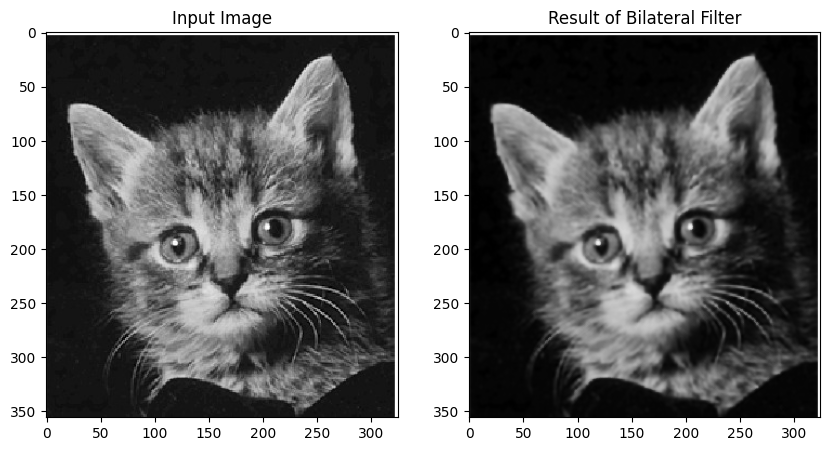

In [5]:
# Apply the Bilateral filter

sigma_range = 100 # TODO
sigma_domain = 100 # TODO
bilateral_filtered_img = cv2.bilateralFilter(img, 5, sigma_range, sigma_domain)   # 5 是空间域核的邻域大小

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(bilateral_filtered_img, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of Bilateral Filter')
plt.show()

<img src='question_sign.png' width=20px height=20px style="float:left;"> Implement a bilateral filter for bluring the image. Please use the widget based approach with sliders for both domain and range kernels similar to the Gaussian blurring example given above.

实现一个双边过滤器来模糊图像。请使用基于小部件的方法，对域和范围核都使用滑块，类似于上面给出的高斯模糊示例。

In [6]:
import matplotlib.pyplot as plt
from ipywidgets import interactive , fixed
import ipywidgets as widgets
from PIL import Image, ImageFilter

# function to blur the image with a variable sigma value
def bilateral_image(image_path,  sigma_r ,sigma_d):
    # Load the image
    img_input = cv2.imread('cat.jpg')

    bilateral_image_out = cv2.bilateralFilter(img_input, 5, sigma_r, sigma_d) ### TODO 
    ### use bilateralFilter function from cv2 library

    # Display the original and blurred images side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(bilateral_image_out, cmap=plt.get_cmap('gray'))
    ax2.set_title('bilateral output')
    ax2.axis('off')
    plt.show()

# range of sigma values are passed here   这里传递的是sigma值的范围
sigma_range = widgets.FloatSlider(min=0, max=500, step=10, value=20)
sigma_domain = widgets.FloatSlider(min=0, max=500, step=10, value=50)
## Implement the widgets with minimum and maximum values as 0 and 500 and step size of 10
## And pass it to sigma_range and sigma_domain



# Creates the interactive widget and here it passes the image and the sigma
blur_widget = interactive(bilateral_image, image_path=fixed('cat.jpg'),sigma_r=sigma_range , sigma_d=sigma_domain)
display(blur_widget)

interactive(children=(FloatSlider(value=20.0, description='sigma_r', max=500.0, step=10.0), FloatSlider(value=…

### Rank Order Filters  排序过滤器

<img src='question_sign.png' width=20px height=20px style="float:left;"> Which are the main three non-linear rank order filters? \
Mean, Max and Median.

三种主要的非线性秩序滤波器是哪一种?
均值，最大值和中值。

Below is an implementation of a minimum filter. Play with the filter size parameter and interpret the behavior you observe.

下面是一个最小过滤器的实现。使用过滤器大小参数并解释您观察到的行为。

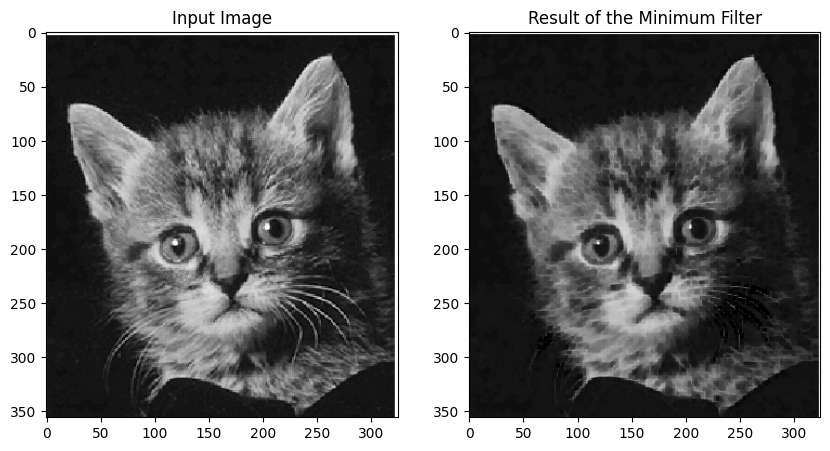

In [7]:
from scipy.ndimage import minimum_filter

img_input = cv2.imread('cat.jpg')
output_image = minimum_filter(img, size=3)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Minimum Filter')
plt.show()
              

In [8]:
# 滑块操作最小值滤波
from scipy.ndimage import minimum_filter
# 定义最大值滤波函数
def min_fil_image(image_path, size):
    # Load the image
    img_input = cv2.imread('cat.jpg')

    min_fil_image_out = minimum_filter(img_input, size) 

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(min_fil_image_out, cmap=plt.get_cmap('gray'))
    ax2.set_title('min_fil output')
    ax2.axis('off')
    plt.show()


size_range = widgets.FloatSlider(min=0, max=15, step=0.5, value=1)
 
blur_widget = interactive(min_fil_image, image_path=fixed('cat.jpg'), size=size_range)
display(blur_widget)

interactive(children=(FloatSlider(value=1.0, description='size', max=15.0, step=0.5), Output()), _dom_classes=…

Below is an implementation of a maximum filter. Play with the filter size parameter and interpret the behavior you observe.

下面是一个最大值过滤器的实现。使用过滤器大小参数并解释您观察到的行为。


较大的滤波器大小会导致更明显的平滑效果，而较小的滤波器大小则可能保留更多的细节，但可能也会保留噪声。最终效果取决于您的图像特性和处理需求。

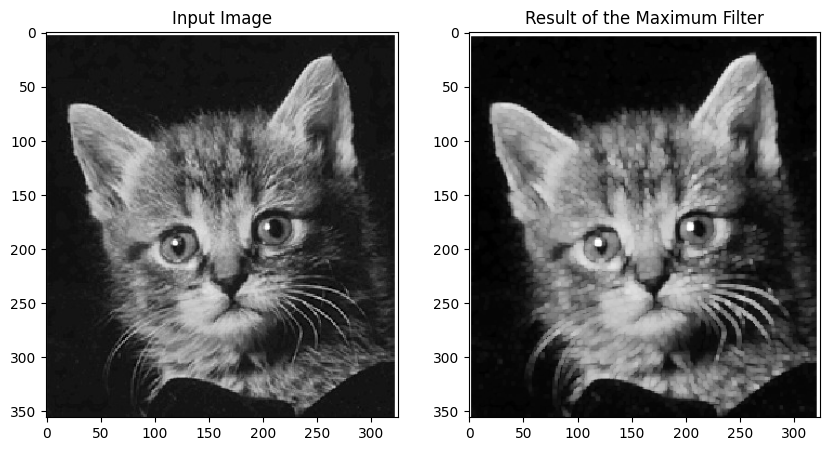

In [9]:
from scipy.ndimage import maximum_filter

output_image = maximum_filter(img, size=3)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Maximum Filter')
plt.show()

In [10]:
# 滑块操作最大值滤波
from scipy.ndimage import maximum_filter
# 定义最大值滤波函数
def max_fil_image(image_path, size):
    # Load the image
    img_input = cv2.imread('cat.jpg')

    max_fil_image_out = maximum_filter(img_input, size) 

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(max_fil_image_out, cmap=plt.get_cmap('gray'))
    ax2.set_title('max_fil output')
    ax2.axis('off')
    plt.show()


size_range = widgets.FloatSlider(min=0, max=15, step=0.5, value=1)
 
blur_widget = interactive(max_fil_image, image_path=fixed('cat.jpg'), size=size_range)
display(blur_widget)

interactive(children=(FloatSlider(value=1.0, description='size', max=15.0, step=0.5), Output()), _dom_classes=…

Below is an implementation of a median filter. Play with the filter size parameter and interpret the behavior you observe.

下面是中值过滤器的实现。使用过滤器大小参数并解释您观察到的行为。

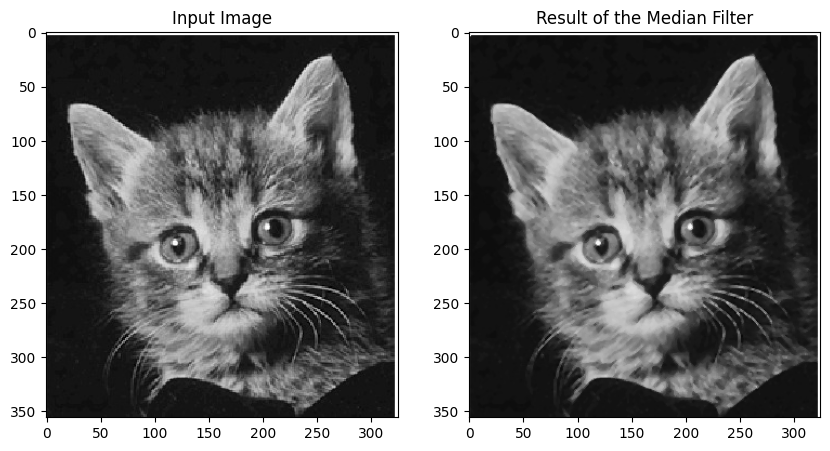

In [11]:
from scipy.ndimage import median_filter

output_image = median_filter(img, size=3)
    
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input Image')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Median Filter')
plt.show()

In [13]:
# 滑块操作中值滤波
from scipy.ndimage import median_filter
# 定义最大值滤波函数
def med_fil_image(image_path, size):
    # Load the image
    img_input = cv2.imread('cat.jpg')

    med_fil_image_out = median_filter(img_input, size) 

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    ax1.imshow(img, cmap=plt.get_cmap('gray'))
    ax1.set_title('Input Image')
    ax1.axis('off')
    ax2.imshow(med_fil_image_out, cmap=plt.get_cmap('gray'))
    ax2.set_title('med_fil output')
    ax2.axis('off')
    plt.show()


size_range = widgets.IntSlider(min=1, max=10, step=1, value=1)
 
blur_widget = interactive(med_fil_image, image_path=fixed('cat.jpg'), size=size_range)
display(blur_widget)

interactive(children=(IntSlider(value=1, description='size', max=10, min=1), Output()), _dom_classes=('widget-…

<img src='question_sign.png' width=20px height=20px style="float:left;"> What type of noise is effectively filtered by the median filter ? \
Salt and pepper noise.

中值滤波器能有效滤除哪种类型的噪声?

椒盐噪声

Below is an implementation of the median filter to remove salt and pepper noise.

下面是去除盐和胡椒噪声的中值滤波器的实现。

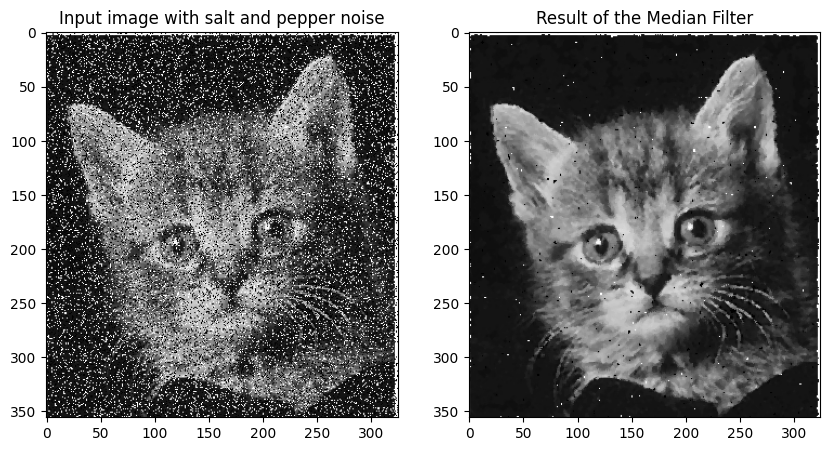

In [21]:
noise_image = np.zeros(img.shape, np.uint8)   # np.uint8：这是一个数据类型，代表无符号8位整数，范围从0到255
cv2.randu(noise_image, 0, 255)   # cv2.randu 函数填充随机噪声值。
salt = noise_image > 250   #noise_image > 250：这是一个布尔表达式，它创建一个布尔数组（或布尔掩码），其形状与 noise_image 相同。
                           # 在这个布尔数组中，每个像素的值将根据条件 noise_image > 250 的结果确定
                           # 如果像素值大于250，则相应位置的布尔值为True，否则为False。
pepper = noise_image < 5

img[salt] = 255   # 被标记为盐噪声的像素，并将它们的像素值设置为255。这将把这些像素变为白色，
img[pepper] = 0   # 被标记为椒噪声的像素，并将它们的像素值设置为0。这将把这些像素变为黑色.

output_image = median_filter(img, size=3)
    

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(img, cmap=plt.get_cmap('gray'))
ax1.set_title('Input image with salt and pepper noise')
ax2.imshow(output_image, cmap=plt.get_cmap('gray'))
ax2.set_title('Result of the Median Filter')
plt.show()
# Plot the image